In [ ]:
######################################################################
## 04_ANALYSIS: Calculating CpG oe ratio plots in R
######################################################################

## This should be done after the python steps have been completed

### Note that any block starting with "SCRIPT" or "ON COMMAND LINE" should be run in terminal and not in notebook

In [2]:
######################################################################
## BLOCK 1. Setup & Load Merged Files
######################################################################

library(ggplot2)
library(viridis)
library(dplyr)
library(readr)

# Load data
df_gene <- read_tsv("~/Mytilus/genome/cpg_methylation_filtered.tsv", show_col_types = FALSE) %>%
  mutate(region = "Gene Body")
df_prom <- read_tsv("~/Mytilus/genome/promoter_cpg_methylation_filtered.tsv", show_col_types = FALSE) %>%
  mutate(region = "Promoter")

# Combine and transform
combined <- bind_rows(df_gene, df_prom) %>%
  mutate(
    log_meth = log10(avg_methylation + 1e-6),
    region = factor(region, levels = c("Gene Body", "Promoter"))
  )

# Spearman correlations
rho_gene <- cor(df_gene$cpg_oe, log10(df_gene$avg_methylation + 1e-6), method = "spearman")
rho_prom <- cor(df_prom$cpg_oe, log10(df_prom$avg_methylation + 1e-6), method = "spearman")

rho_df <- tibble(
  cpg_oe = 1.5,
  log_meth = 1.8,
  region = c("Gene Body", "Promoter"),
  rho_text = c(
    paste0("rho == ", round(rho_gene, 3)),
    paste0("rho == ", round(rho_prom, 3))
  )
)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(level)` instead.”


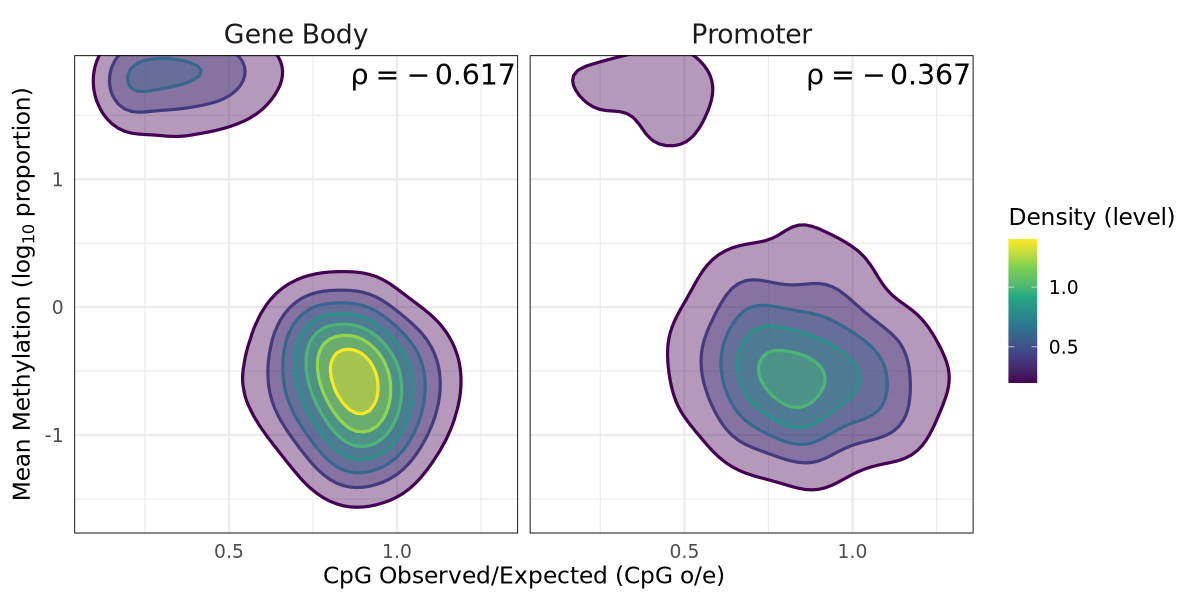

In [3]:
######################################################################
## BLOCK 2. Panel Figure – CpG o/e vs Methylation (Gene Body & Promoter)
######################################################################

# Enlarge output for Jupyter
options(repr.plot.width = 10, repr.plot.height = 5)

ggplot(combined, aes(x = cpg_oe, y = log_meth)) +

  # Replace filled with standard density contours
  stat_density_2d(
    aes(fill = ..level..),
    geom = "polygon",
    contour = TRUE,
    n = 100,
    alpha = 0.4
  ) +

  # Add contour lines on top for emphasis
  stat_density_2d(
    aes(color = after_stat(level)),
    size = 0.9
  ) +

  # Spearman correlation text
  geom_text(data = rho_df,
            aes(x = cpg_oe, y = log_meth, label = rho_text),
            parse = TRUE, inherit.aes = FALSE,
            hjust = 1.3, size = 6, fontface = "italic", color = "black") +

  # Facet by region
  facet_wrap(~region, nrow = 1) +

  # Axes
  coord_cartesian(xlim = c(0.1, 1.3), ylim = c(-1.6, 1.8)) +
  scale_fill_viridis_c(option = "D", name = "Density (level)") +
  scale_color_viridis_c(option = "D", guide = "none") +

  theme_minimal(base_size = 14) +
  theme(
    strip.text = element_text(size = 16),
    legend.position = "right",
    panel.border = element_rect(color = "black", fill = NA, linewidth = 0.5)
  ) +
  labs(
    x = "CpG Observed/Expected (CpG o/e)",
    y = expression("Mean Methylation ("*log[10]*" proportion)")
  )   

ggsave(
  "Fig1.pdf",
  combined,
)